In [1]:
!pip install pandasql

In [1]:
import numpy as np

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from pandasql import sqldf
import pandas as pd
scans = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='UCP Scans')
reservations = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='UCP Reservations')
ticket = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='Single Game Sales and Scans')

In [587]:
query = '''
SELECT *
FROM scans
JOIN reservations
ON scans.event_datetime = reservations.EVENT_DATE_LOCAL
AND scans.section_name = reservations.SECTION
AND scans.row_name = reservations.ROW
AND scans.seat_number = reservations.SEAT;
'''
merge = sqldf(query)
merge = merge[merge['TENANT_MEMBER_NUMBER'] != '1000-000-0000']

In [588]:
duplicates = merge.columns[merge.columns.duplicated()]
merge = merge.iloc[:, ~merge.columns.duplicated()]

In [589]:
merge

,event_datetime,event_date,section_name,row_name,seat_number,scan_datetime,TICKET_ID,EVENT_NAME,EVENT_DATE_LOCAL,SECTION,ROW,SEAT,RESERVED_AT,TENANT_MEMBER_NUMBER
0,2022-10-30 12:00:00.000000,2022-10-30 00:00:00.000000,301,5,18,2022-10-30 13:41:23.000000,88644,Pelicans @ Clippers,2022-10-30 12:00:00.000000,301,5,18,2022-08-22 20:33:00.000000,1000-000-0212
1,2022-10-30 12:00:00.000000,2022-10-30 00:00:00.000000,316,4,9,2022-10-30 13:49:32.000000,90326,Pelicans @ Clippers,2022-10-30 12:00:00.000000,316,4,9,2022-09-01 15:06:00.000000,1000-000-0236
2,2022-10-30 12:00:00.000000,2022-10-30 00:00:00.000000,318,8,24,2022-10-30 13:59:27.000000,88540,Pelicans @ Clippers,2022-10-30 12:00:00.000000,318,8,24,2022-08-23 00:31:00.000000,1000-000-0384
3,2022-10-30 12:00:00.000000,2022-10-30 00:00:00.000000,318,8,3,2022-10-30 13:58:44.000000,88626,Pelicans @ Clippers,2022-10-30 12:00:00.000000,318,8,3,2022-08-22 09:11:00.000000,1000-000-0377
4,2022-10-30 12:00:00.000000,2022-10-30 00:00:00.000000,301,1,6,2022-10-30 14:08:44.000000,90145,Pelicans @ Clippers,2022-10-30 12:00:00.000000,301,1,6,2022-08-31 16:32:00.000000,1000-000-0420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6969,2023-03-25 19:30:00.000000,2023-03-25 00:00:00.000000,317,1,2,None,135773,Pelicans @ Clippers,2023-03-25 19:30:00.000000,317,1,2,2023-01-09 00:44:00.000000,1000-000-0400
6970,2023-03-05 19:00:00.000000,2023-03-05 00:00:00.000000,317,11,6,None,169397,Grizzlies @ Clippers,2023-03-05 19:00:00.000000,317,11,6,2023-03-02 04:22:00.000000,1000-000-0266
6971,2023-03-11 13:00:00.000000,2023-03-11 00:00:00.000000,317,1,2,None,127080,Knicks @ Clippers,2023-03-11 13:00:00.000000,317,1,2,2022-11-14 09:28:00.000000,1000-000-0279
6972,2023-03-25 19:30:00.000000,2023-03-25 00:00:00.000000,311,2W,9,None,181447,Pelicans @ Clippers,2023-03-25 19:30:00.000000,311,2W,9,2023-03-21 08:53:00.000000,1000-000-0038


In [593]:
member_avg['scans'].mean()

125.5

In [591]:
query = '''
SELECT EVENT_NAME, event_date, EVENT_DATE_LOCAL,
       COUNT(TICKET_ID) as reservations,
       COUNT(scan_datetime) as scans
FROM merge
GROUP BY EVENT_DATE_LOCAL
'''
member_avg = sqldf(query)
member_avg['attendence rate'] = member_avg['scans']/member_avg['reservations']

In [592]:
member_avg

,EVENT_NAME,event_date,EVENT_DATE_LOCAL,reservations,scans,attendence rate
0,Suns @ Clippers,2022-10-23 00:00:00.000000,2022-10-23 19:00:00.000000,260,225,0.865385
1,Pelicans @ Clippers,2022-10-30 00:00:00.000000,2022-10-30 12:00:00.000000,234,177,0.756410
2,Rockets @ Clippers,2022-10-31 00:00:00.000000,2022-10-31 19:30:00.000000,142,81,0.570423
3,Jazz @ Clippers,2022-11-06 00:00:00.000000,2022-11-06 19:00:00.000000,186,128,0.688172
4,Cavaliers @ Clippers,2022-11-07 00:00:00.000000,2022-11-07 19:30:00.000000,209,168,0.803828
5,Nets @ Clippers,2022-11-12 00:00:00.000000,2022-11-12 13:00:00.000000,280,214,0.764286
6,Pistons @ Clippers,2022-11-17 00:00:00.000000,2022-11-17 19:30:00.000000,167,117,0.700599
7,Spurs @ Clippers,2022-11-19 00:00:00.000000,2022-11-19 19:30:00.000000,164,108,0.658537
8,Jazz @ Clippers,2022-11-21 00:00:00.000000,2022-11-21 19:30:00.000000,165,113,0.684848
9,Nuggets @ Clippers,2022-11-25 00:00:00.000000,2022-11-25 19:30:00.000000,208,145,0.697115


In [594]:
member_avg[['Opponent', 'Team']] = member_avg['EVENT_NAME'].str.split(' @ ', expand=True)

In [595]:
team = pd.read_excel('Data Challenge Master File.xlsx', sheet_name='Team Data')

In [596]:
dummies1 = pd.get_dummies(team['Playoffs in 2020-2021'],prefix='Playoffs in 2020-2021',drop_first = True)
dummies2 = pd.get_dummies(team['Playoffs in 2021-2022'],prefix='Playoffs in 2021-2022', drop_first = True)
dummies3 = pd.get_dummies(team['Conference'],drop_first = True)
team = pd.concat([team, dummies1, dummies2, dummies3], axis=1)

In [597]:
team

,Team Code,Team,Team Full Name,City,Founded,Joined NBA,Conference,Arena,Arena City-State,Capacity,...,Long,Year Opened,Playoffs in 2020-2021,Playoffs in 2021-2022,Championships,Vegas Over/Under 21/22,Vegas Over/Under 22/23,Playoffs in 2020-2021_Yes,Playoffs in 2021-2022_Yes,Western
0,ATL,Hawks,Atlanta Hawks,Atlanta,1946,1949,Eastern,State Farm Arena,"Atlanta, Georgia",18118,...,-84.398513,1999,Yes,Yes,1,47.5,45.5,1,1,0
1,BOS,Celtics,Boston Celtics,Boston,1946,1946,Eastern,TD Garden,"Boston, Massachusetts",18624,...,-71.064335,1995,Yes,Yes,17,45.5,53.5,1,1,0
2,BRK,Nets,Brooklyn Nets,Brooklyn,1967,1976,Eastern,Barclays Center,"Brooklyn, New York",17732,...,-73.977602,2012,Yes,Yes,0,56.5,50.5,1,1,0
3,CHA,Hornets,Charlotte Hornets,Charlotte,1988,1988,Eastern,Spectrum Center,"Charlotte, North Carolina",19077,...,-80.841492,2005,No,No,0,38.5,36.5,0,0,0
4,CHI,Bulls,Chicago Bulls,Chicago,1966,1966,Eastern,United Center,"Chicago, Illinois",20917,...,-87.676365,1994,No,Yes,6,42.5,42.5,0,1,0
5,CLE,Cavaliers,Cleveland Cavaliers,Cleveland,1970,1970,Eastern,Rocket Mortgage FieldHouse,"Cleveland, Ohio",20562,...,-81.690402,1994,No,No,1,26.5,47.5,0,0,0
6,DAL,Mavericks,Dallas Mavericks,Dallas,1980,1980,Western,American Airlines Center,"Dallas, Texas",19200,...,-96.812544,2001,Yes,Yes,1,48.5,48.5,1,1,1
7,DEN,Nuggets,Denver Nuggets,Denver,1967,1976,Western,Pepsi Center,"Denver, Colorado",19520,...,-105.009899,1999,Yes,Yes,0,47.5,49.5,1,1,1
8,DET,Pistons,Detroit Pistons,Detroit,1941,1948,Eastern,Little Caesars Arena,"Detroit, Michigan",20491,...,-83.057226,2017,No,No,3,24.5,29.5,0,0,0
9,GSW,Warriors,Golden State Warriors,San Francisco,1946,1946,Western,Chase Center,"San Francisco, California",18064,...,-122.387787,2019,No,Yes,7,48.5,51.5,0,1,1


In [598]:
member_avg['EVENT_DATE_LOCAL'] = pd.to_datetime(member_avg['EVENT_DATE_LOCAL'])
def categorize_event(event_time):
    if event_time.hour < 18:
        return 'afternoon_event'
    else:
        return 'evening_event'
member_avg['event_category'] = member_avg['EVENT_DATE_LOCAL'].apply(lambda x: categorize_event(x))
dummies4 = pd.get_dummies(member_avg['event_category'],drop_first=True)
member_avg = pd.concat([member_avg, dummies4], axis=1)

In [599]:
data = pd.merge(team, member_avg, left_on='Team', right_on='Opponent')
data = data.drop(['Team Code', 'City', 'Opponent','Founded','Arena City-State','Capacity','Lat','Long','Year Opened','Team_y','Arena','Conference','Playoffs in 2020-2021','Playoffs in 2021-2022','EVENT_NAME','event_category'], axis=1)

In [600]:
from datetime import datetime, timedelta
schedule = pd.read_excel('sportsref_download-3.xltx')
schedule['Date'] = pd.to_datetime(schedule['Date'],format='%a, %b %d, %Y') 
schedule = schedule.drop(columns=['Unnamed: 3','Unnamed: 4','Unnamed: 8','Notes'])
schedule = schedule.rename(columns={'Unnamed: 5':'roadgames', 'Unnamed: 7':'Result'})
sevenhomestands = schedule.groupby((schedule['roadgames'].isna() != schedule['roadgames'].isna().shift()).cumsum()).filter(lambda x: len(x) >= 3 and x['roadgames'].isna().all())

In [601]:
data['event_date'] = pd.to_datetime(data['event_date']) 
data['homestands'] = data['event_date'].isin(sevenhomestands['Date'])
dummies = pd.get_dummies(data['homestands'],prefix='homestands',drop_first = True)
data = pd.concat([data, dummies], axis=1)

In [602]:
schedule.loc[0, ['total_w', 'total_l']] = [np.nan, np.nan]
schedule.loc[1:, ['total_w', 'total_l']] = schedule.loc[0:len(schedule)-2, ['W', 'L']].values
mapping_dict = {'W': 1, 'L': -1}
def map_result(result):
    result_split = result.split()
    value = int(result_split[1])
    if result_split[0] in mapping_dict:
        return mapping_dict[result_split[0]] * value
    else:
        return None
schedule['Streak'] = schedule['Streak'].apply(map_result)
schedule['Streak'] = schedule['Streak'].shift(periods=1)
schedule.loc[0, 'Streak'] = pd.np.nan

In [603]:
schedule = schedule.sort_values(['Opponent', 'Date'])
schedule['Prev_Result'] = schedule.groupby('Opponent')['Result'].shift()
schedule.loc[schedule.groupby('Opponent')['Prev_Result'].head(1).index, 'Prev_Result'] = ''
schedule = schedule.sort_values(['Date'])
home = schedule[schedule['roadgames'].isna()]
dummy1 = pd.get_dummies(home['Prev_Result'],prefix='Prev_Result',drop_first = True)
home = pd.concat([home, dummy1], axis=1)

In [604]:
schedule

,G,Date,Start (ET),roadgames,Opponent,Result,Tm,Opp,W,L,Streak,total_w,total_l,Prev_Result
0,1,2022-10-20,10:00p,@,Los Angeles Lakers,W,103,97,1,0,NaN,NaN,NaN,
1,2,2022-10-22,10:00p,@,Sacramento Kings,W,111,109,2,0,1.0,1.0,0.0,
2,3,2022-10-23,10:00p,NaN,Phoenix Suns,L,95,112,2,1,2.0,2.0,0.0,
3,4,2022-10-25,8:00p,@,Oklahoma City Thunder,L,94,108,2,2,-1.0,2.0,1.0,
4,5,2022-10-27,8:00p,@,Oklahoma City Thunder,L,110,118,2,3,-2.0,2.0,2.0,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,78,2023-03-31,8:00p,@,Memphis Grizzlies,L,94,108,41,37,2.0,41.0,36.0,W
78,79,2023-04-01,8:30p,@,New Orleans Pelicans,L,114,122,41,38,-1.0,41.0,37.0,L
79,80,2023-04-05,10:00p,NaN,Los Angeles Lakers,W,125,118,42,38,-2.0,41.0,38.0,W
80,81,2023-04-08,4:00p,NaN,Portland Trail Blazers,W,136,125,43,38,1.0,42.0,38.0,W


In [605]:
data = pd.merge(data, home, left_on='event_date', right_on='Date')

In [606]:
data = data.drop(['Start (ET)','roadgames','Opponent','Result','Tm','Opp','W','L','Prev_Result','homestands'],axis=1)

In [607]:
duplicates = data.columns[data.columns.duplicated()]
data = data.iloc[:, ~data.columns.duplicated()]

In [608]:
data.columns

Index(['Team_x', 'Team Full Name', 'Joined NBA', 'Championships',
       'Vegas Over/Under 21/22', 'Vegas Over/Under 22/23',
       'Playoffs in 2020-2021_Yes', 'Playoffs in 2021-2022_Yes', 'Western',
       'event_date', 'EVENT_DATE_LOCAL', 'reservations', 'scans',
       'attendence rate', 'evening_event', 'homestands_True', 'G', 'Date',
       'Streak', 'total_w', 'total_l', 'Prev_Result_L', 'Prev_Result_W'],
      dtype='object')

In [609]:
data = data.sort_values(['event_date'])
data

,Team_x,Team Full Name,Joined NBA,Championships,Vegas Over/Under 21/22,Vegas Over/Under 22/23,Playoffs in 2020-2021_Yes,Playoffs in 2021-2022_Yes,Western,event_date,...,attendence rate,evening_event,homestands_True,G,Date,Streak,total_w,total_l,Prev_Result_L,Prev_Result_W
24,Suns,Phoenix Suns,1968,0,51.5,52.5,1,1,1,2022-10-23,...,0.865385,1,0,3,2022-10-23,2.0,2.0,0.0,0,0
18,Pelicans,New Orleans Pelicans,2002,0,39.5,44.5,0,1,1,2022-10-30,...,0.756410,0,0,6,2022-10-30,-3.0,2.0,3.0,0,0
11,Rockets,Houston Rockets,1967,2,27.5,23.5,0,0,1,2022-10-31,...,0.570423,1,0,7,2022-10-31,-4.0,2.0,4.0,0,0
31,Jazz,Utah Jazz,1974,0,52.5,24.5,1,1,1,2022-11-06,...,0.688172,1,1,10,2022-11-06,3.0,5.0,4.0,0,0
5,Cavaliers,Cleveland Cavaliers,1970,1,26.5,47.5,0,0,0,2022-11-07,...,0.803828,1,1,11,2022-11-07,-1.0,5.0,5.0,0,0
2,Nets,Brooklyn Nets,1976,0,56.5,50.5,1,1,0,2022-11-12,...,0.764286,0,1,13,2022-11-12,2.0,7.0,5.0,0,0
10,Pistons,Detroit Pistons,1948,3,24.5,29.5,0,0,0,2022-11-17,...,0.700599,1,1,16,2022-11-17,-1.0,8.0,7.0,0,0
28,Spurs,San Antonio Spurs,1976,5,28.5,22.5,0,0,1,2022-11-19,...,0.658537,1,1,17,2022-11-19,1.0,9.0,7.0,0,1
32,Jazz,Utah Jazz,1974,0,52.5,24.5,1,1,1,2022-11-21,...,0.684848,1,1,18,2022-11-21,2.0,10.0,7.0,1,0
8,Nuggets,Denver Nuggets,1976,0,47.5,49.5,1,1,1,2022-11-25,...,0.697115,1,0,20,2022-11-25,-1.0,11.0,8.0,0,0


In [610]:
data['scans']

24    225
18    177
11     81
31    128
5     168
2     214
10    117
28    108
32    113
8     145
13     79
26     88
1     182
16     95
25    107
33     77
3     127
15    135
0     117
6     149
9     116
12    103
29     86
7     159
27    151
17    107
14    157
30     85
20    138
23    117
21    120
22     88
19    119
4      89
Name: scans, dtype: int64

<AxesSubplot:xlabel='total_l', ylabel='Count'>

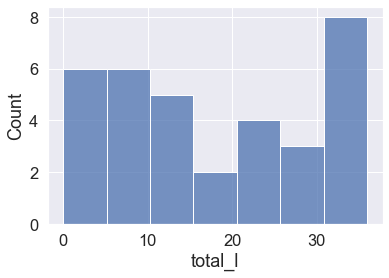

In [611]:
sns.histplot(data['total_l'])

In [612]:
import pandas as pd
from sklearn.linear_model import LinearRegression
X = data[['Championships','Vegas Over/Under 21/22','Vegas Over/Under 22/23',
          'Playoffs in 2020-2021_Yes', 'Playoffs in 2021-2022_Yes',
          'Western','evening_event',
          'homestands_True', 'Prev_Result_L',
          'Prev_Result_W','Streak', 'total_w', 'total_l']]
y = data['scans']
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [613]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print('Mean Squared Error:', mse)
print('R2 score:', r2)

Mean Squared Error: 611.6688992703025
R2 score: 0.5492540378384585


In [614]:
upcoming_event = pd.DataFrame({
    'Championships':[1],
    'Vegas Over/Under 21/22': [44.5],
    'Vegas Over/Under 22/23': [39.5],
    'Playoffs in 2020-2021_Yes': [1],
    'Playoffs in 2021-2022_Yes': [0], 
    'Western': [1],
    'evening_event': [0],
    'homestands_True': [0], 
    'Prev_Result_L': [0],
    'Prev_Result_W': [1],
    'Streak': [-1], 
    'total_w':[39], 
    'total_l':[36]
})
prediction = model.predict(upcoming_event)
print(prediction)

[143.74941836]


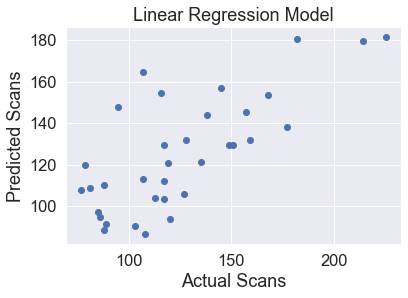

In [615]:
import matplotlib.pyplot as plt
import seaborn as sns
y_pred = model.predict(X)
sns.set(font_scale=1.5)
plt.scatter(y, y_pred)
plt.xlabel('Actual Scans')
plt.ylabel('Predicted Scans')
plt.title('Linear Regression Model')
plt.show()

In [685]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
X = data[['Championships',
       'Vegas Over/Under 22/23','Vegas Over/Under 21/22', 'Playoffs in 2020-2021_Yes',
       'Playoffs in 2021-2022_Yes', 'evening_event',
       'homestands_True', 'Prev_Result_L',
       'Prev_Result_W','Streak', 'total_w', 'total_l']]
y = data['scans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, max_depth=4, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Mean Squared Error: 899.2915161194207
R-squared Score: 0.04322380819325122


In [622]:
breaks = [75,100,125,150,175,200,225,250]
data['scans1'] = pd.cut(data['scans'], bins=breaks)
data

,Team_x,Team Full Name,Joined NBA,Championships,Vegas Over/Under 21/22,Vegas Over/Under 22/23,Playoffs in 2020-2021_Yes,Playoffs in 2021-2022_Yes,Western,event_date,...,evening_event,homestands_True,G,Date,Streak,total_w,total_l,Prev_Result_L,Prev_Result_W,scans1
24,Suns,Phoenix Suns,1968,0,51.5,52.5,1,1,1,2022-10-23,...,1,0,3,2022-10-23,2.0,2.0,0.0,0,0,"(200, 225]"
18,Pelicans,New Orleans Pelicans,2002,0,39.5,44.5,0,1,1,2022-10-30,...,0,0,6,2022-10-30,-3.0,2.0,3.0,0,0,"(175, 200]"
11,Rockets,Houston Rockets,1967,2,27.5,23.5,0,0,1,2022-10-31,...,1,0,7,2022-10-31,-4.0,2.0,4.0,0,0,"(75, 100]"
31,Jazz,Utah Jazz,1974,0,52.5,24.5,1,1,1,2022-11-06,...,1,1,10,2022-11-06,3.0,5.0,4.0,0,0,"(125, 150]"
5,Cavaliers,Cleveland Cavaliers,1970,1,26.5,47.5,0,0,0,2022-11-07,...,1,1,11,2022-11-07,-1.0,5.0,5.0,0,0,"(150, 175]"
2,Nets,Brooklyn Nets,1976,0,56.5,50.5,1,1,0,2022-11-12,...,0,1,13,2022-11-12,2.0,7.0,5.0,0,0,"(200, 225]"
10,Pistons,Detroit Pistons,1948,3,24.5,29.5,0,0,0,2022-11-17,...,1,1,16,2022-11-17,-1.0,8.0,7.0,0,0,"(100, 125]"
28,Spurs,San Antonio Spurs,1976,5,28.5,22.5,0,0,1,2022-11-19,...,1,1,17,2022-11-19,1.0,9.0,7.0,0,1,"(100, 125]"
32,Jazz,Utah Jazz,1974,0,52.5,24.5,1,1,1,2022-11-21,...,1,1,18,2022-11-21,2.0,10.0,7.0,1,0,"(100, 125]"
8,Nuggets,Denver Nuggets,1976,0,47.5,49.5,1,1,1,2022-11-25,...,1,0,20,2022-11-25,-1.0,11.0,8.0,0,0,"(125, 150]"


In [648]:
data['scans1'].value_counts()

(100, 125]    11
(75, 100]      9
(125, 150]     6
(150, 175]     4
(175, 200]     2
(200, 225]     2
(225, 250]     0
Name: scans1, dtype: int64

In [687]:
y = data['scans1']
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5714285714285714


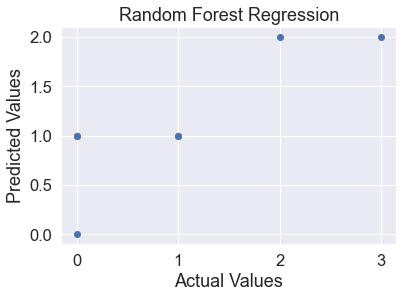

In [688]:
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regression')
plt.show()

In [689]:
upcoming_event = pd.DataFrame({
    'Championships':[1],
    'Vegas Over/Under 21/22': [44.5],
    'Vegas Over/Under 22/23': [39.5],
    'Playoffs in 2020-2021_Yes': [1],
    'Playoffs in 2021-2022_Yes': [0], 
    'evening_event': [0],
    'homestands_True': [0], 
    'Prev_Result_L': [0],
    'Prev_Result_W': [1],
    'Streak': [-1], 
    'total_w':[39], 
    'total_l':[36]
})
prediction = model.predict(upcoming_event)
print(prediction)

[0]


In [673]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
gb = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=0)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.14285714285714285


In [690]:
importance = model.feature_importances_
feat_df = pd.DataFrame({'Feature':X.columns,'Importance':importance})
feat_df

,Feature,Importance
0,Championships,0.105371
1,Vegas Over/Under 22/23,0.157595
2,Vegas Over/Under 21/22,0.139762
3,Playoffs in 2020-2021_Yes,0.040972
4,Playoffs in 2021-2022_Yes,0.027972
5,evening_event,0.024903
6,homestands_True,0.047511
7,Prev_Result_L,0.082200
8,Prev_Result_W,0.038964
9,Streak,0.087143


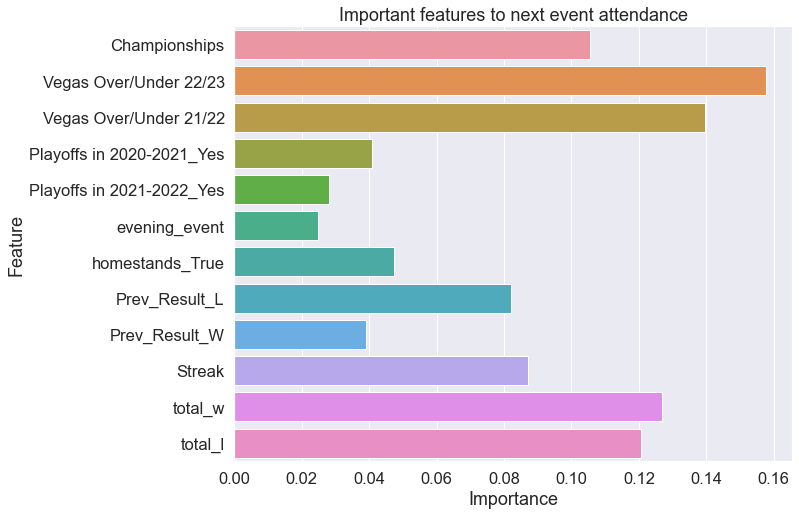

In [695]:
values = feat_df.Importance    
idx = feat_df.Feature
plt.figure(figsize=(10,8))
sns.barplot(y=idx,x=values).set(title='Important features to next event attendance')
plt.show()

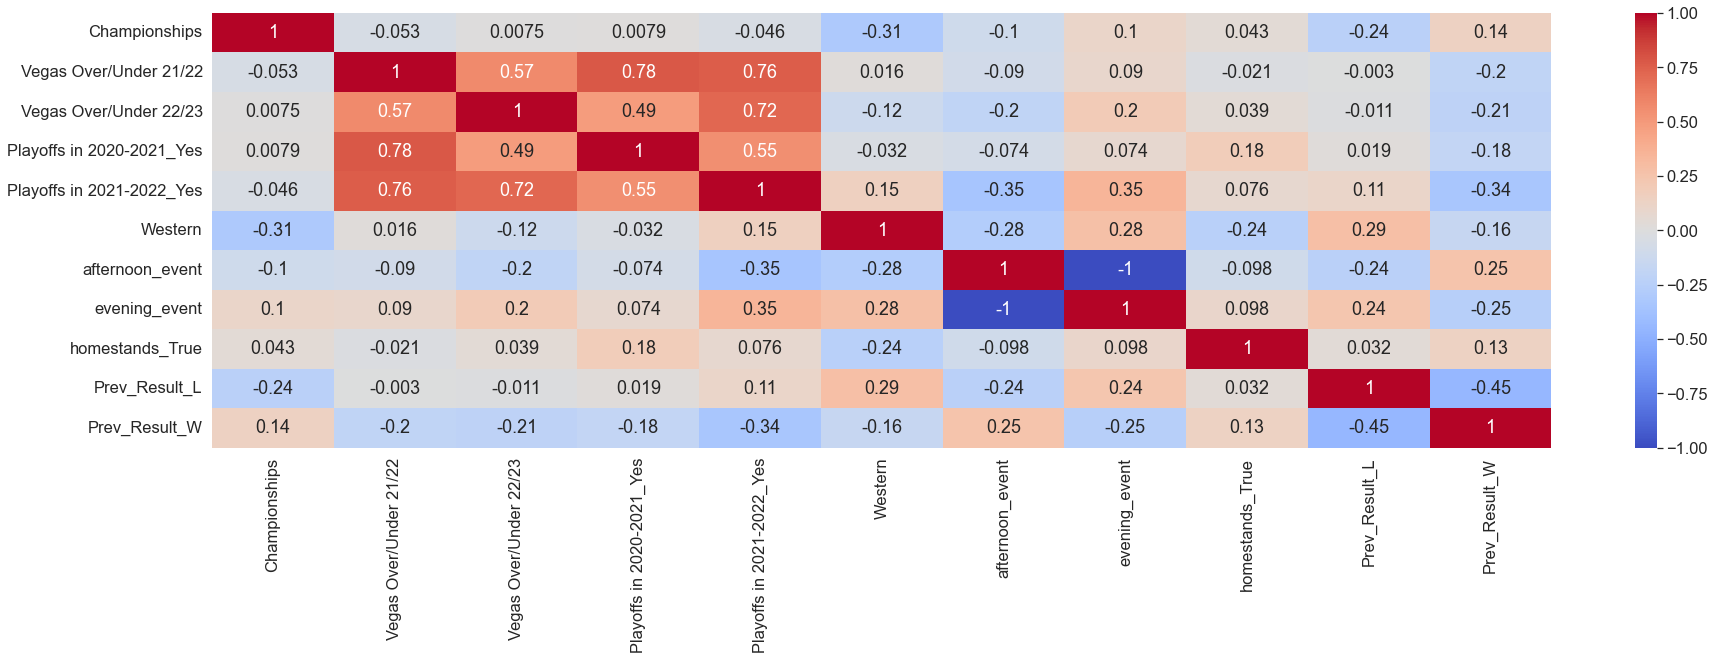

In [308]:
corr = X.corr()
plt.figure(figsize=(30,8))
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.show()